In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [2]:
df_titanic = pd.read_csv(r"C:\Users\apico\Downloads\titanic_dataset.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.shape

(891, 12)

### Exploración de datos

In [4]:
# Mostramos información del DF
df_titanic.info()

# Tenemos valores con categoria objeto, tendremos que modificarlos
# Tenemos algunas columnas con valores nulos y tendremos que indagar que como podemos limpiar esos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Identificamos los valores nulos para proceder a su eliminación
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Eliminamos primero las columnas que no deseamos y luego eliminamos los registros los nulos
df_titanic.drop(['Cabin','Name','Ticket', 'PassengerId'], axis=1, inplace = True)
df_titanic.dropna(inplace = True)
df_titanic.shape

(712, 8)

### Preprocesamiento de datos

In [7]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Buscamos valores atípicos para determinar que técnica utilizamos para la normalización de datos

Q1 = df_titanic.quantile(0.25)
Q3 = df_titanic.quantile(0.75)
IQR = Q3 - Q1

# Establecer un umbral para los valores atípicos
umbral = 1.5
valores_atipicos = df_titanic[((df_titanic < Q1 - umbral * IQR) | (df_titanic > Q3 + umbral * IQR))]

contador_nan = valores_atipicos.isna().sum()

print(contador_nan)

Survived    712
Pclass      712
Sex         712
Age         704
SibSp       677
Parch       697
Fare        617
Embarked    712
dtype: int64


C:\Users\apico\AppData\Local\Temp\ipykernel_9872\3888248849.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_titanic.quantile(0.25)
C:\Users\apico\AppData\Local\Temp\ipykernel_9872\3888248849.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_titanic.quantile(0.75)
C:\Users\apico\AppData\Local\Temp\ipykernel_9872\3888248849.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  valores_atipicos = df_titanic[((df_titanic < Q1 - umbral * IQR) | (df_titan

#### Visaulización de Datos

C:\Users\apico\AppData\Local\Temp\ipykernel_9872\2284582713.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Survived', y= 'Age', data= df_titanic, palette= 'rainbow')
C:\Users\apico\anaconda3.1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


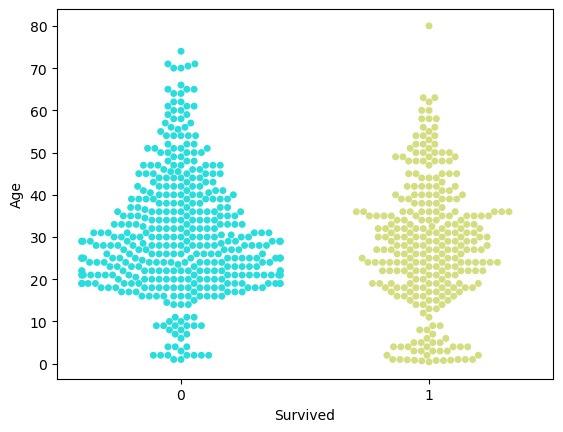

In [9]:
# Relación de fallecidos por edad

sns.swarmplot(x='Survived', y= 'Age', data= df_titanic, palette= 'rainbow')
plt.show()

In [10]:
# Calculamos correlación entre variables para entender mejor los datos, 
# y para comprobar si es posible aplicar PCA o de lo contrario tenemos que aplicar LDA.

corr = df_titanic.corr()
corr

C:\Users\apico\AppData\Local\Temp\ipykernel_9872\1478965150.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_titanic.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


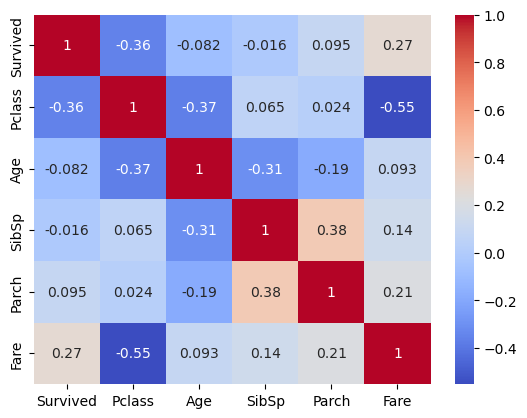

In [28]:
sns.heatmap(corr, annot= True,cmap='coolwarm')
plt.show()

### Variables dummy

In [12]:
# Pclass

pclass_dum = pd.get_dummies(df_titanic['Pclass'], prefix='Pclass') # Creamos las columnas de las categorias
df_titanic.drop('Pclass', axis=1, inplace=True ) # ELiminamos la columna original del DF porque ya no nos hace falta
df_titanic = df_titanic.join(pclass_dum) # Añadimos las columnas nueva creadas

# Sex

sex_dum = pd.get_dummies(df_titanic['Sex'], prefix='Sex')
df_titanic.drop('Sex', axis=1, inplace=True ) 
df_titanic = df_titanic.join(sex_dum) 


# Embarked

embarked_dum = pd.get_dummies(df_titanic['Embarked'], prefix='Embarked')
df_titanic.drop('Embarked', axis=1, inplace=True ) 
df_titanic = df_titanic.join(embarked_dum) 

df_titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [13]:
# Eliminamos ultimas columnas porque ya tenemos ese dato en la tabla
df_titanic.drop(['Pclass_3', 'Sex_male', 'Embarked_S'], axis= 1, inplace= True)
df_titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0


In [14]:
df_titanic.shape

(712, 10)

### Selección de Datos

In [15]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_titanic.drop('Survived', axis=1)
# Defino los datos correspondientes a las etiquetas
y = df_titanic['Survived']

#### Normalización de los datos

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

#### Validación cruzada

In [17]:
# Creamos el KNN vacío con la variable K que queramos
k= 3
knn_model = KNeighborsClassifier(n_neighbors=k) 

# Aplicamos la validación cruzada con 5 particiones
scores = cross_val_score(knn_model, X, y, cv=5)

# Realizamos la media de todos los resultados
avg_score = np.mean(scores)

print(scores)
print(avg_score)
# Todos rondan el 0.75, es un conjunto estable

[0.75524476 0.76923077 0.8028169  0.79577465 0.81690141]
0.7879936964444006


### Creación del Modelo
#### División de datos (conjuntos de entrenamiento y de prueba)

In [18]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

#### Aplicación del modelo

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicción del conjunto de datos de validación

In [20]:
y_pred = knn_model.predict(X_val)

#### Validación de resultados validación

In [21]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_val
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
147,0,0
245,0,0
477,0,0
632,1,0
360,0,0


#### Evaluación del Modelo / Matriz de confusión

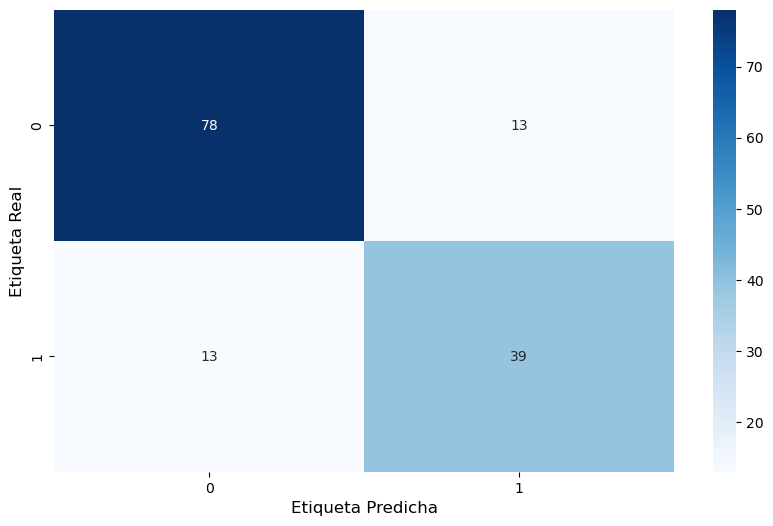

In [22]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

#### Métricas

In [23]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        91
           1       0.75      0.75      0.75        52

    accuracy                           0.82       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.82      0.82      0.82       143



### Predicción del conjunto de datos de prueba

In [24]:
y_pred = knn_model.predict(X_test)

#### Validación de resultados de prueba

In [25]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
423,0,0
178,0,0
305,1,1
292,0,0
592,0,0


#### Evaluación del Modelo / Matriz de confusión

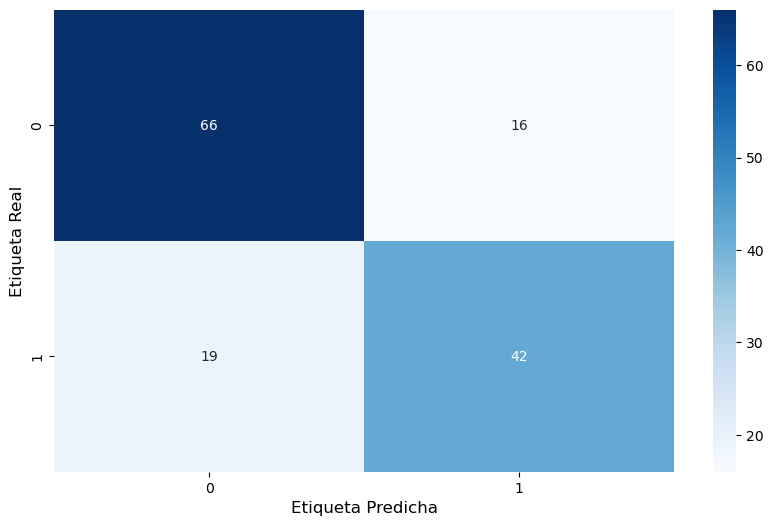

In [26]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

#### Métricas

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        82
           1       0.72      0.69      0.71        61

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.75       143



# Conclusión

He realizado una exploración previa donde he detectado algunos valores nulos en la Edad y el camararote, para los cuales he decidido eliminar la columna de camarote junto a otras que no aportaban nada al modelo, y despues eliminar los registros nulos restantes. En segundo lugar, he encontrado datos atípicos en la tabla, por lo que he utilizado el StandardScaler para conseguir normalizar los datos con un fiabilidad mayor que con MinMaxScaler. En tercer  lugar, he comprobado la correlación entre las variables para entender un poco mas los datos. Aunque no vayamos utilizar el PCA en esta tabla por tratarse de datos etiquetados, la correlación nos da un visión más detallada de las relaciones entre las variables. En este caso, lo correcto sería usar la LDA, pero al tratarse de solo dos clases(survival/not survival), no permite aplicarla.
Una vez realizado todo esto, he procedido a pasar a numéricas todas las variables categóricas y la columna 'Pclass', puesto que, independientemente de que sea una variable numérica, su orden podria causar confusión al modelo. Despues de aplicar el get_dummies para pasar a numéricas, he eliminado la última columna generada de cada variable porque nos estaba creando una duplicidad de datos.
He realizado una validación cruzada de todos los datos con 5 particiones que me ha dado una media de un 75%, demostranado que son unos datos bastante estables. Tanto el conjunto de validación como el de prueba, ha rondado el 75-80%, identificando correctamente solo 42 supervivientes de 61 posibles.